In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# Load dataset
df = pd.read_csv('C:/Users/festu/OneDrive/Documents/Horace Mann/Insurance fraud.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
# Sanity Check
print('Shape:', df.shape)
print('Missing Values:', df.isnull().sum().sum())
print('Duplicates:', df.duplicated().sum())
df.nunique().sort_values()

Shape: (15420, 33)
Missing Values: 0
Duplicates: 0


WitnessPresent              2
AgentType                   2
FraudFound_P                2
AccidentArea                2
PoliceReportFiled           2
Fault                       2
Sex                         2
Year                        3
BasePolicy                  3
VehicleCategory             3
PastNumberOfClaims          4
Days_Policy_Claim           4
DriverRating                4
Deductible                  4
MaritalStatus               4
NumberOfSuppliments         4
NumberOfCars                5
WeekOfMonthClaimed          5
Days_Policy_Accident        5
AddressChange_Claim         5
WeekOfMonth                 5
VehiclePrice                6
DayOfWeek                   7
DayOfWeekClaimed            8
AgeOfVehicle                8
PolicyType                  9
AgeOfPolicyHolder           9
Month                      12
MonthClaimed               13
RepNumber                  16
Make                       19
Age                        66
PolicyNumber            15420
dtype: int

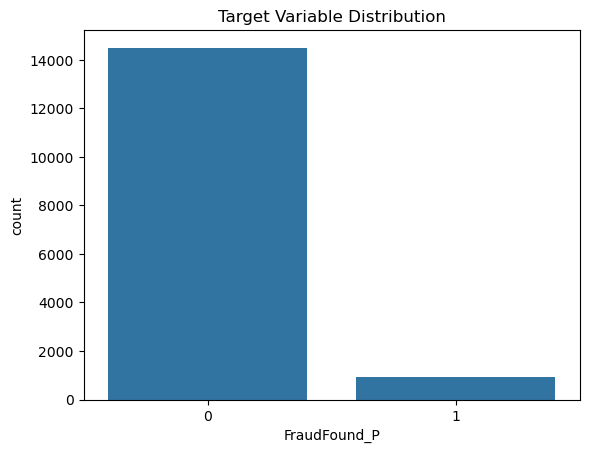

In [7]:
sns.countplot(x='FraudFound_P', data=df)
plt.title('Target Variable Distribution')
plt.show()

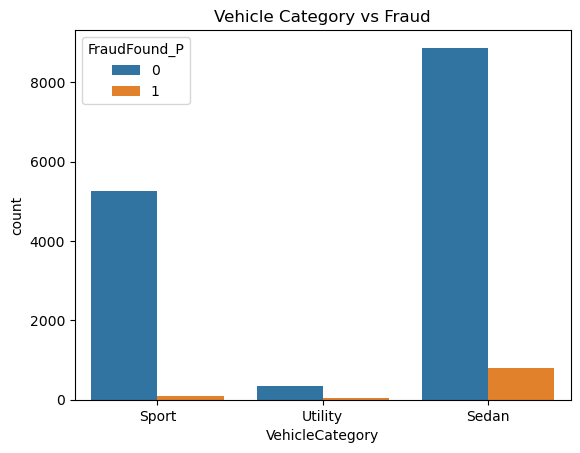

In [9]:
# Example categorical plot
sns.countplot(x='VehicleCategory', hue='FraudFound_P', data=df)
plt.title('Vehicle Category vs Fraud')
plt.show()

In [11]:
# Drop unique ID
df = df.drop(columns=['PolicyNumber'])
# Encode categoricals
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [13]:
X = df_encoded.drop(columns=['FraudFound_P'])
y = df_encoded['FraudFound_P']
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
results_df

C:\Users\festu\OneDrive\Desktop\Python folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\festu\OneDrive\Desktop\Python folder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\festu\OneDrive\Desktop\Python folder\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:52:34] WARNING: C:\buildkite-a

,Model,Accuracy,Precision,Recall,F1 Score,AUC
1,Random Forest,0.949414,0.932857,0.912011,0.922316,0.984830
3,XGBoost,0.945275,0.920423,0.912709,0.916550,0.983267
5,KNN,0.867786,0.717402,0.987430,0.831031,0.971451
0,Logistic Regression,0.825247,0.739658,0.724162,0.731828,0.907168
4,Naive Bayes,0.713727,0.538117,0.921788,0.679537,0.879335
2,SVM,0.670729,0.000000,0.000000,0.000000,0.849557


C:\Users\festu\AppData\Local\Temp\ipykernel_27640\3964742567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='mako')


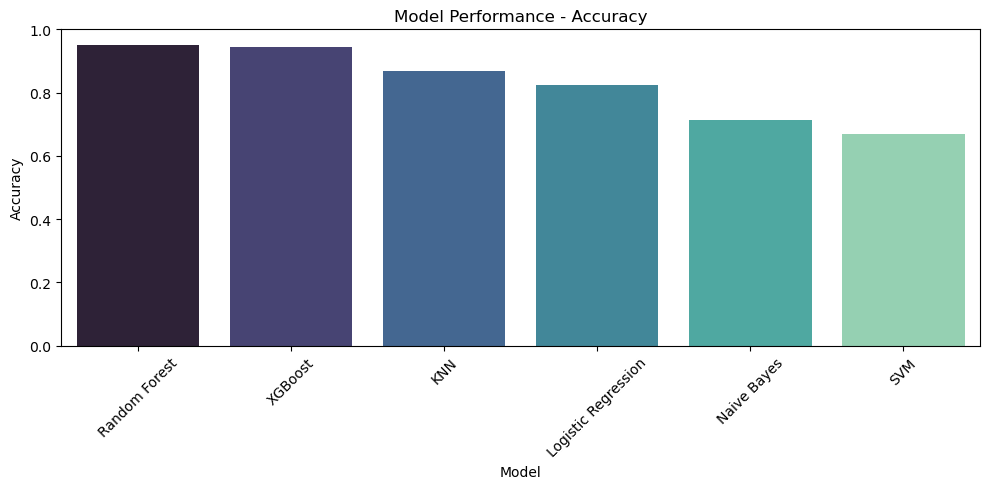

C:\Users\festu\AppData\Local\Temp\ipykernel_27640\3964742567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='mako')


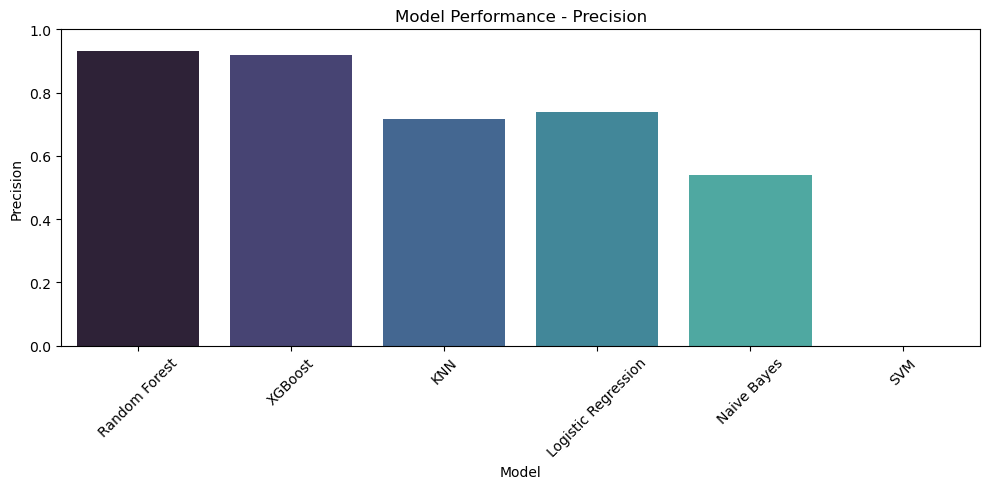

C:\Users\festu\AppData\Local\Temp\ipykernel_27640\3964742567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='mako')


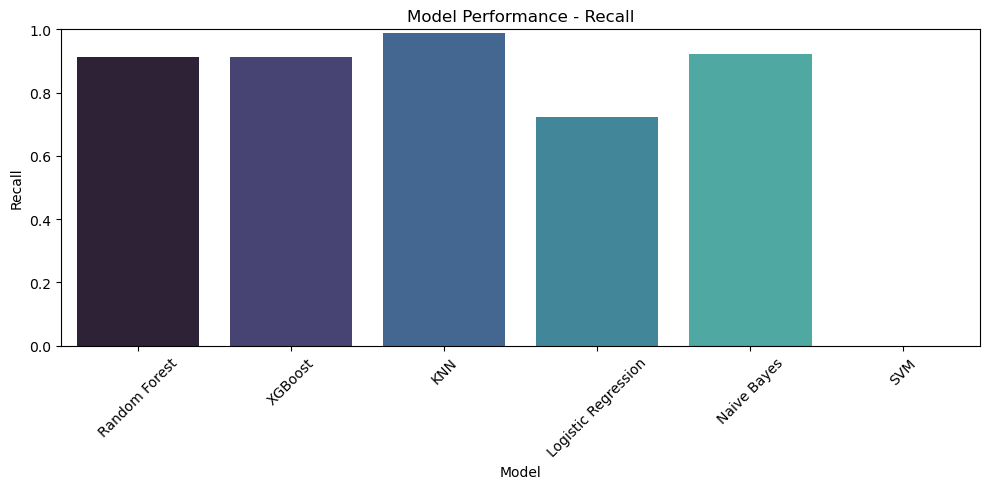

C:\Users\festu\AppData\Local\Temp\ipykernel_27640\3964742567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='mako')


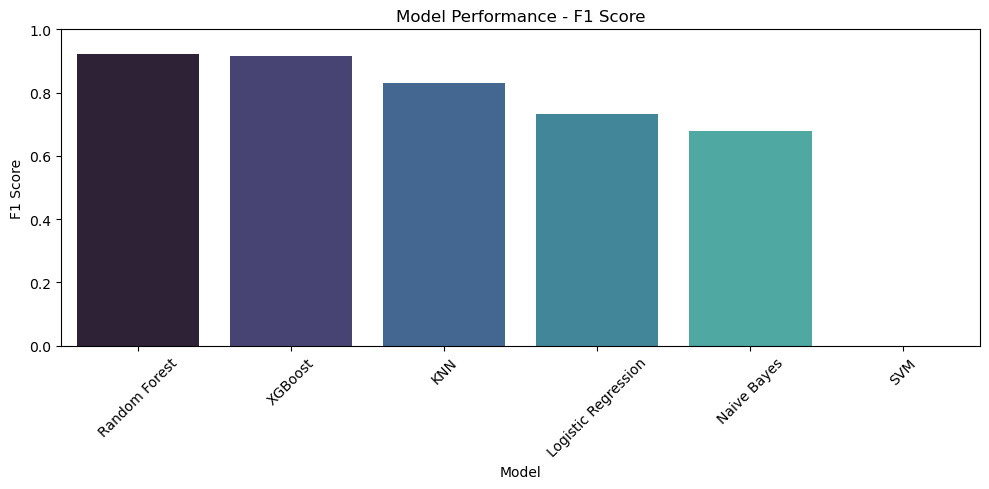

C:\Users\festu\AppData\Local\Temp\ipykernel_27640\3964742567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='mako')


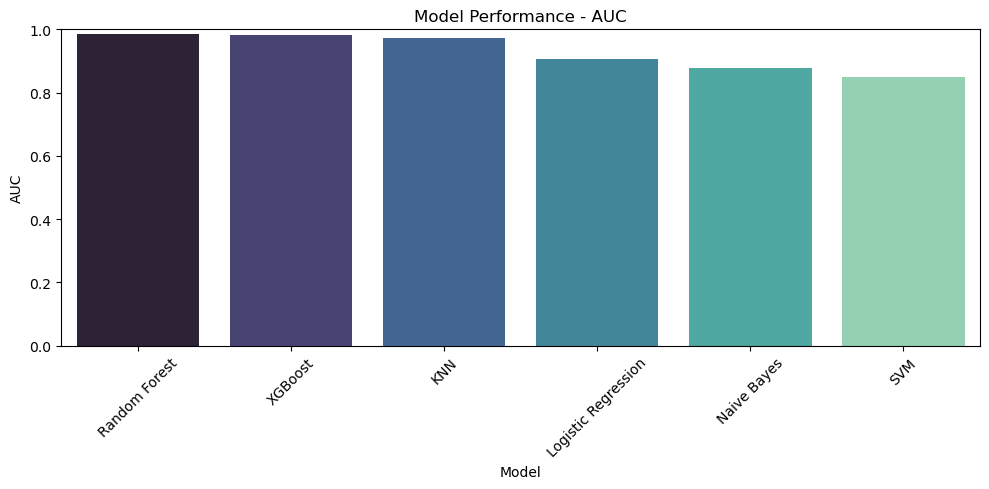

In [16]:
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Model', y=metric, data=results_df, palette='mako')
    plt.title(f'Model Performance - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()